In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# Data preparation

In [2]:
NYoil = pd.read_csv('RCLC1d.csv',parse_dates =["Date"], index_col ="Date")
NYoil.rename(columns={'Cushing, OK Crude Oil Future Contract 1 (Dollars per Barrel)':'nyoil'}, inplace=True)
NYoil1 = NYoil.loc['2009-11-16':'2019-09-30']
NYoil=NYoil.loc['1983-04-04':'2019-10-01']
NYoil.head()

,nyoil
Date,
1983-04-04,29.44
1983-04-05,29.71
1983-04-06,29.92
1983-04-07,30.17
1983-04-08,30.38


In [3]:
bond = pd.read_csv('10yeartreasurybondrateyield.csv',parse_dates =["date"], index_col ="date")
bond.rename(columns={'date':'date','value':'10yearbond'}, 
                 inplace=True)
#bond=bond.set_index('date')
bond = bond.loc['2009-11-16':'2019-09-30']    
bond.head()

,10yearbond
date,
2009-11-16,3.33
2009-11-17,3.33
2009-11-18,3.36
2009-11-19,3.35
2009-11-20,3.36


In [4]:
rts = pd.read_csv('RTSI.csv',parse_dates =["Date"], index_col ="Date")
rts.rename(columns={'Date':"date",'Price':'rts'}, 
                 inplace=True)
rts = rts.drop(['Open','High','Low',"Vol.","Change %"], axis =1)
rts = rts.loc['2019-09-30':'2009-11-16']
rts.head()


,rts
Date,
2019-09-30,1333.91
2019-09-27,1347.72
2019-09-26,1359.59
2019-09-25,1354.01
2019-09-24,1358.80


In [5]:
xop = pd.read_csv('XOP.csv',parse_dates =["Date"], index_col ="Date")
xop = xop.drop(['Open','High','Low',"Adj Close","Volume"], axis =1)
xop.rename(columns={'Date':"Date",'Close':'xop'}, 
                 inplace=True)  
xop = xop.loc['2009-11-16':'2019-09-30']
xop.head()

,xop
Date,
2009-11-16,40.209999
2009-11-17,39.759998
2009-11-18,39.360001
2009-11-19,38.360001
2009-11-20,38.060001


In [6]:
cpi = pd.read_csv('CPI.csv',parse_dates =["Label"], index_col ="Label")
cpi = cpi.drop(['Series ID','Year','Period'], axis =1)
cpi.rename(columns={'Value':'cpi'}, inplace=True)
cpi = cpi.resample('D').ffill()
cpi1 = cpi.loc['2009-11-16':'2019-09-30']
cpi=cpi.loc['1983-04-04':'2019-10-01']
cpi.head()

,cpi
Label,
1983-04-04,98.6
1983-04-05,98.6
1983-04-06,98.6
1983-04-07,98.6
1983-04-08,98.6


In [7]:
gold = pd.read_csv('Gold.csv',parse_dates =["date"], index_col ="date")
gold.rename(columns={'date':'date',' value':'Gold'}, 
                 inplace=True)
gold = gold.loc['2009-11-16':'2019-09-30']    
gold.head()

,Gold
date,
2009-11-20,1142.50
2009-11-23,1166.00
2009-11-24,1170.25
2009-11-25,1176.50
2009-11-26,1183.00


In [8]:
money = pd.read_csv('moneybase.csv',parse_dates =["DATE"], index_col ="DATE")
money.rename(columns={'DATE':'DATE','BOGMBASEW':'money'}, 
                 inplace=True)
money = money.loc['2009-11-16':'2019-09-30']    
money.head()

,money
DATE,
2009-11-18,1989940.0
2009-11-25,2072256.0
2009-12-02,2072256.0
2009-12-09,2036838.0
2009-12-16,2036838.0


In [9]:
finaldata= pd.concat([NYoil1,bond,rts,xop,cpi1,gold,money], axis=1)
finaldata.head()

,nyoil,10yearbond,rts,xop,cpi,Gold,money
2009-11-16,78.90,3.33,1481.82,40.209999,216.33,NaN,NaN
2009-11-17,79.14,3.33,1472.76,39.759998,216.33,NaN,NaN
2009-11-18,79.58,3.36,1486.62,39.360001,216.33,NaN,1989940.0
2009-11-19,77.46,3.35,1451.20,38.360001,216.33,NaN,NaN
2009-11-20,76.72,3.36,1436.44,38.060001,216.33,1142.5,NaN


In [10]:
finaldata.isnull().sum()
finaldata=finaldata.fillna(method='pad')
finaldata.isnull().sum()

nyoil         0
10yearbond    0
rts           0
xop           0
cpi           0
Gold          4
money         2
dtype: int64

In [11]:
finaldata = finaldata.dropna()
finaldata.head()

,nyoil,10yearbond,rts,xop,cpi,Gold,money
2009-11-20,76.72,3.36,1436.44,38.060001,216.33,1142.50,1989940.0
2009-11-21,76.72,3.36,1436.44,38.060001,216.33,1142.50,1989940.0
2009-11-22,76.72,3.36,1436.44,38.060001,216.33,1142.50,1989940.0
2009-11-23,77.56,3.37,1466.77,38.480000,216.33,1166.00,1989940.0
2009-11-24,76.02,3.32,1447.23,38.720001,216.33,1170.25,1989940.0


In [38]:
Y = finaldata['xop']
X1 = finaldata.copy().drop(['xop'], axis =1)
Y.head()

2009-11-20    38.060001
2009-11-21    38.060001
2009-11-22    38.060001
2009-11-23    38.480000
2009-11-24    38.720001
Name: xop, dtype: float64

## time series split and feature selection

In [66]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X = X1.values
splits = TimeSeriesSplit(n_splits=4)
for train_index, test_index in splits.split(X):
    X_train = X[train_index]
    X_test = X[test_index]
    Y_train = Y[train_index]
    Y_test = Y[test_index]
    model = LinearRegression()
    rfe = RFE(model, 6)
    fit = rfe.fit(X_train, Y_train)
    predict = rfe.predict(X_test)
    r2 = r2_score(Y_test, predict)
    print("r2 score:", r2)
    print('Training Observations: %d' % (len(X_train)))
    print('Testing Observations: %d' % (len(X_test)))

r2 score: -1.4016747412723056
Training Observations: 722
Testing Observations: 720
r2 score: 0.6682327592877004
Training Observations: 1442
Testing Observations: 720
r2 score: -2.03117416663813
Training Observations: 2162
Testing Observations: 720
r2 score: 0.5694103781005946
Training Observations: 2882
Testing Observations: 720


In [68]:
nobs = 720
X_train, X_test = X1[0:-nobs], X1[-nobs:]
Y_train, Y_test = Y[0:-nobs], Y[-nobs:]

# Model

In [69]:
model = LinearRegression()
model.fit(X_train,Y_train)
preds = model.predict(X_test)
pred_data_LR = pd.DataFrame(preds, index = finaldata.index[-nobs:])
pred_data_LR.head()

,0
2017-10-11,36.137280
2017-10-12,35.792619
2017-10-13,36.473311
2017-10-14,36.473311
2017-10-15,36.473311


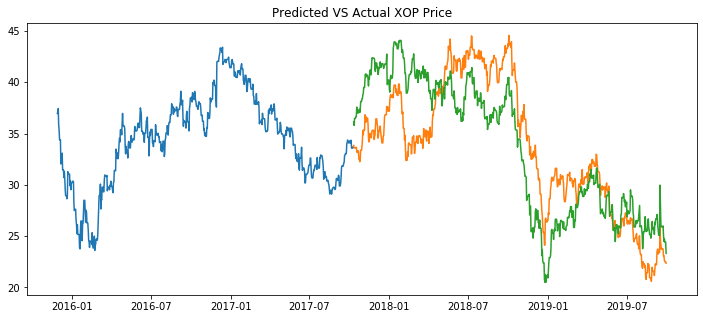

In [75]:
plt.figure(figsize=(12,5))
plt.plot(Y_train[2200:3310])
plt.plot(Y_test)
plt.plot(pred_data_LR)
plt.title("Predicted VS Actual XOP Price")
plt.savefig('XOP_LinReg.png')